Paradigm[1] & Paradigm[2]

How do we set our weight values so that our network predicts accurately?

Compare - a measurement of how much our prediction "missed". 
What we do about our error is captured in the next paradigm(i.e. Learn). "Hot or cold" type signal. Missed a lot or a little. It won't tell why we missed, which direction or what we should do to fix it.

Learn - "Learning" takes our error and tells each weight how it 
can change to reduce it. "blame game" - the art of figuring out how each weight played its part in creating error.
A number for each weight that will represent how much it should be higher or lower. Then, we move the knob_weight according to that number, and we're done with it.

>A  neural network is nothing more than a set of weights which
we use to compute an error function.

In [1]:
knob_weight, input, goal_pred = (.5, .5, .8);
pred = input * knob_weight;
msquared_error = (pred - goal_pred) ** 2; 
#or ((input * weight) - goal_pred) ** 2
print(msquared_error);

0.30250000000000005


**Mean squared error** has two properties:
> `Amplify big errors(>1 i.e. make them bigger) whilst ignoring small ones(<1 i.e. make them smaller).` 

> `Negative reversal(Negative error wouldn't make sense).`

Hot and cold. Simplest form of learn. Wiggling our weights to see which direction reduces the error the most, moving our weights in that direction, and repeating until the error gets to zero or smaller than up and down given by the step amount. Here learning is really one thing: 
> adjusting our knob_weight either up or down so that our error reduces.

In [4]:
ntoes, win_or_lose_binary, weight, step_amount = (8.5, 1, .1, .01);
def neural_network(information, knowledge):
    return information * knowledge;

for i in range(5):
    pred = neural_network(ntoes, weight);
    error = (neural_network(ntoes, weight) - win_or_lose_binary) ** 2;
    error_up = (neural_network(ntoes, (weight + step_amount)) - win_or_lose_binary) ** 2;
    error_down = (neural_network(ntoes, (weight - step_amount)) - win_or_lose_binary) ** 2;

    if (error > error_down or error > error_up):
        if(error_up > error_down):
            weight -= step_amount;
        else:
            weight += step_amount;

    print('Pred: ' + str(pred) + ' Error: ' 
      + str(error) + ' Weight: ' + str(weight));
    print('Error_down: ' + str(error_down) 
          + ' Error_up: ' + str(error_up) + '\n------------\n');

Pred: 0.8500000000000001 Error: 0.022499999999999975 Weight: 0.11
Error_down: 0.05522499999999994 Error_up: 0.004224999999999993
------------

Pred: 0.935 Error: 0.004224999999999993 Weight: 0.12
Error_down: 0.022499999999999975 Error_up: 0.0004000000000000007
------------

Pred: 1.02 Error: 0.0004000000000000007 Weight: 0.12
Error_down: 0.004224999999999993 Error_up: 0.011024999999999997
------------

Pred: 1.02 Error: 0.0004000000000000007 Weight: 0.12
Error_down: 0.004224999999999993 Error_up: 0.011024999999999997
------------

Pred: 1.02 Error: 0.0004000000000000007 Weight: 0.12
Error_down: 0.004224999999999993 Error_up: 0.011024999999999997
------------



In [21]:
input, weight, goal_prediction, step_amount = (.5, .5, .8, .01);

for i in range(1101):
    pred = neural_network(input, weight);
    error = (neural_network(input, weight) - goal_prediction) ** 2;
    error_up = (neural_network(input, (weight + step_amount)) - goal_prediction) ** 2;
    error_down = (neural_network(input, (weight - step_amount)) - goal_prediction) ** 2;

    if(error_up > error_down):
        if(i % 100 == 0):
            print("down")
        weight -= step_amount;
    else:
        if(i % 100 == 0):
            print("up")
        weight += step_amount;

    if(i % 100 == 0):
        print('Pred: ' + str(pred) + ' Error: ' 
          + str(error) + ' Weight: ' + str(weight));
        print('Error_down: ' + str(error_down) 
              + ' Error_up: ' + str(error_up) + '\n------------\n');

up
Pred: 0.25 Error: 0.30250000000000005 Weight: 0.51
Error_down: 0.30802500000000005 Error_up: 0.29702500000000004
------------

up
Pred: 0.7500000000000004 Error: 0.00249999999999996 Weight: 1.510000000000001
Error_down: 0.0030249999999999565 Error_up: 0.0020249999999999635
------------

down
Pred: 0.8000000000000005 Error: 1.9721522630525295e-31 Weight: 1.590000000000001
Error_down: 2.4999999999995603e-05 Error_up: 2.5000000000004484e-05
------------

down
Pred: 0.8000000000000005 Error: 1.9721522630525295e-31 Weight: 1.590000000000001
Error_down: 2.4999999999995603e-05 Error_up: 2.5000000000004484e-05
------------

down
Pred: 0.8000000000000005 Error: 1.9721522630525295e-31 Weight: 1.590000000000001
Error_down: 2.4999999999995603e-05 Error_up: 2.5000000000004484e-05
------------

down
Pred: 0.8000000000000005 Error: 1.9721522630525295e-31 Weight: 1.590000000000001
Error_down: 2.4999999999995603e-05 Error_up: 2.5000000000004484e-05
------------

down
Pred: 0.8000000000000005 Error: 

>It`s inefficient because we have to predict 3 times 
to make a single knob_weight update.
And the value of step_amount is picked up arbitrarily.

Direction and amount from error:

In [25]:
input, weight, goal_prediction = (.5, .5, .8);

for i in range(20):
    
    pred = neural_network(input, weight);
    
    #raw direction and amount that we missed 
    #if it`s positive, we predicted to high and vice-versa. 
    #If it`s big, oh boy we missed by a lot.
    pure_error = pred - goal_pred;
    
    msquared_error = pure_error ** 2;
    
    #how we want to change our weight. The absolute amount.
    direction_and_amount = pure_error * input;
    
    #performs scaling, negative reversal and stopping.
    weight -= direction_and_amount;
    
    print('\nPred: ' + str(pred) + ' Error: ' + str(msquared_error));


Pred: 0.25 Error: 0.30250000000000005

Pred: 0.3875 Error: 0.17015625000000004

Pred: 0.49062500000000003 Error: 0.095712890625

Pred: 0.56796875 Error: 0.05383850097656251

Pred: 0.6259765625 Error: 0.03028415679931642

Pred: 0.669482421875 Error: 0.0170348381996155

Pred: 0.70211181640625 Error: 0.00958209648728372

Pred: 0.7265838623046875 Error: 0.005389929274097089

Pred: 0.7449378967285156 Error: 0.0030318352166796153

Pred: 0.7587034225463867 Error: 0.0017054073093822882

Pred: 0.76902756690979 Error: 0.0009592916115275371

Pred: 0.7767706751823426 Error: 0.0005396015314842384

Pred: 0.7825780063867569 Error: 0.000303525861459885

Pred: 0.7869335047900676 Error: 0.00017073329707118678

Pred: 0.7902001285925507 Error: 9.603747960254256e-05

Pred: 0.7926500964444131 Error: 5.402108227642978e-05

Pred: 0.7944875723333098 Error: 3.038685878049206e-05

Pred: 0.7958656792499823 Error: 1.7092608064027242e-05

Pred: 0.7968992594374867 Error: 9.614592036015323e-06

Pred: 0.7976744445781

**Gradient Descent in it`s more native environment.**

Weight update for a single training pair i.e. input => true;

In [47]:
ntoes, weight, alpha = (8.5, .1, .01);
for i in range(100): 
    
    #paradigm[0] - Predict
    pred = neural_network(ntoes, weight); 
    msquared_error = (pred - win_or_lose_binary) ** 2;
    
    #paradigm[1] - Compare
    # delta is a measurement of "how much this node missed"
    #instead of computing direction_and_amount directly, we first compute
    #how much we wanted our output node to be different.
    delta = pred - win_or_lose_binary; 
    
    #paradigm[2]-Learn
    #weight_delta TLDR;-"how much this weight caused the network to miss"
    #weight_delta = weight's input * weight's output(i.e. Node_Delta);
    #Therefore, we create each "Weight Delta" by scaling its output 
    #"Node Delta" by the weight's input.
    weight_delta = ntoes * delta;
    
    #Alpha 
    #how fast the network learns i.e. avoid divergence.
    #small alpha means we learn too slowly, for the weight is update by a really small amount.
    
    #Big alpha means we overcorrect even more. We scale the overcorrection, meaning the prediction is even more sensitive to the weight
    #than it was before.
    
    #A negative alpha, causes us to move in the wrong direction, which is basically the same direction of the slope,
    #when we should be moving in the opposite direction
    
    weight -= weight_delta * alpha;
    
    print('Pred: ' + str(pred) + ' Error: ' + str(msquared_error));
    if (msquared_error == 0):  break; 
    print('------------');

Input: 8.5 Weight: 0.1
Pred: 0.8500000000000001 Error: 0.0025000000000000044
Delta: 0.050000000000000044 Weight_Delta: 0.4250000000000004
 ------------------ 

Input: 8.5 Weight: 0.09575
Pred: 0.813875 Error: 0.0001925156249999992
Delta: 0.01387499999999997 Weight_Delta: 0.11793749999999975
 ------------------ 

Input: 8.5 Weight: 0.094570625
Pred: 0.8038503125 Error: 1.4824906347656314e-05
Delta: 0.0038503125000000082 Weight_Delta: 0.03272765625000007
 ------------------ 

Input: 8.5 Weight: 0.0942433484375
Pred: 0.80106846171875 Error: 1.1416104444341378e-06
Delta: 0.001068461718749969 Weight_Delta: 0.009081924609374736
 ------------------ 

Input: 8.5 Weight: 0.09415252919140625
Pred: 0.8002964981269531 Error: 8.79111392866925e-08
Delta: 0.0002964981269530931 Weight_Delta: 0.002520234079101291
 ------------------ 

Input: 8.5 Weight: 0.09412732685061524
Pred: 0.8000822782302296 Error: 6.769707169706643e-09
Delta: 8.227823022954883e-05 Weight_Delta: 0.0006993649569511651
 -----------

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

Breaking Gradient Descent

Input: 2 Weight: 0.5
Pred: 1.0 Error: 0.03999999999999998
Delta: 0.19999999999999996 Weight_Delta: 0.3999999999999999
 ------------------ 

Input: 2 Weight: 0.10000000000000009
Pred: 0.20000000000000018 Error: 0.3599999999999998
Delta: -0.5999999999999999 Weight_Delta: -1.1999999999999997
 ------------------ 

Input: 2 Weight: 1.2999999999999998
Pred: 2.5999999999999996 Error: 3.2399999999999984
Delta: 1.7999999999999996 Weight_Delta: 3.599999999999999
 ------------------ 

Input: 2 Weight: -2.2999999999999994
Pred: -4.599999999999999 Error: 29.159999999999986
Delta: -5.399999999999999 Weight_Delta: -10.799999999999997
 ------------------ 

Input: 2 Weight: 8.499999999999998
Pred: 16.999999999999996 Error: 262.4399999999999
Delta: 16.199999999999996 Weight_Delta: 32.39999999999999
 ------------------ 

Input: 2 Weight: -23.89999999999999
Pred: -47.79999999999998 Error: 2361.959999999998
Delta: -48.59999999999998 Weight_Delta: -97.19999999999996
 ------------------ 

Input: 2 Weight: 73

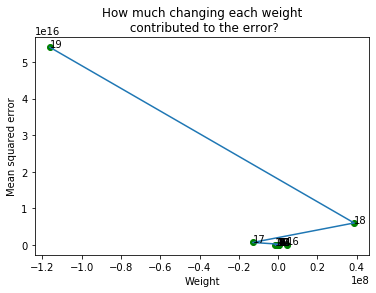

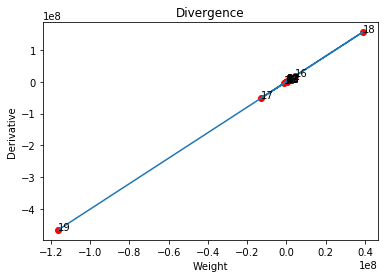

In [55]:
import matplotlib.pyplot as plt;
import numpy as np;
import random as rand

weight, goal_pred, input, alpha = (.5, .8, 2, 1);
interaction = 20;
fig1, ax1 = plt.subplots();
fig2, ax2 = plt.subplots();
weights, derivatives, errors = ([], [], []);

def neural_network(input, weight):
    for i in range(interaction):
        print('Input: ' + str(input) + ' Weight: ' + str(weight))
        weights.append(weight);
        pred = input * weight;
        msquared_error = ((input * weight) - goal_pred) ** 2;
        errors.append(msquared_error);
        delta = pred - goal_pred;
        #derivative: how fast the error changes given changes in the weight
        weight_delta = input * delta;
        derivatives.append(weight_delta);
        weight -= weight_delta * alpha;
        print(
          'Pred: ' + str(pred) + ' Error: ' + str(msquared_error)
          + '\nDelta: ' + str(delta) + ' Weight_Delta: ' + str(weight_delta)
          + '\n ------------------ \n');
    plot_it_all(weights, errors, derivatives);
        
def plot_it_all(weights, errors, derivatives):
    
    ax1.set_title('How much changing each weight' 
                  + '\n contributed to the error?');
    ax1.set_ylabel('Mean squared error');
    ax1.set_xlabel('Weight');
    ax1.scatter(weights, errors, s=None, c='g');
    ax1.plot(weights, errors);
    for i in range(len(weights)):
        ax1.annotate(i, (weights[i], errors[i]));
    ax2.set_title('Divergence');
    ax2.set_ylabel('Derivative');
    ax2.set_xlabel('Weight');
    ax2.scatter(weights, derivatives, s=None, c='r');
    ax2.plot(weights, derivatives);
    for i in range(len(weights)):
        ax2.annotate(i, (weights[i], derivatives[i]));
    
    
neural_network(input, weight);

> In fact we can change anything in our pred calculation except the **_input_**.

> the derivative of our weight defines the relationship between each weight and how much we missed. **_How much changing a weight contributed to the error_**.

The slope of a line or curve always points in the opposite direction to the **_lowest point_** of the line or curve.

In [26]:
weight -= (input * (pred - goal_pred));

Take a look at this formula:
    
`error = ((input * weight) - goal_pred) ** 2`

*How can we use  this formula to change weight so that error moves in a particular direction?*

**Derivatives**:
    
*It’s the sensitivity between two variables*. There's:
>positive sensitivity (when variables move together)

>negative sensitivity (when they move in opposite directions)

>zero sensitivity (when one stays fixed regardless of what you do to the other)

In [66]:
input, weight, goal_pred, alpha = (58004540, 1, -.4, .0000000000000001)
iterations = 100

def neural_network(input, weight):
    for i in range(iterations):
        pred = np.dot(input, weight)
        delta = pred - goal_pred
        error = delta ** 2
        weight_delta = delta * input
        weight -= weight_delta * alpha
        print('Error: ' + str(error) + ' Pred: ' + str(pred))

neural_network(input, weight)

Error: 3364526707015232.0 Pred: 58004540
Error: 1481384503064559.5 Pred: 38488757.738767736
Error: 652246285144407.8 Pred: 25539112.449596163
Error: 287180820107539.44 Pred: 16946409.842512704
Error: 126444297677187.17 Pred: 11244744.936253158
Error: 55672800185925.0 Pred: 7461420.38869199
Error: 24512459141928.773 Pred: 4951005.471732407
Error: 10792714775942.502 Pred: 3285226.346503581
Error: 4751979047079.897 Pred: 2179903.04902702
Error: 2092272920453.826 Pred: 1446468.7218459612
Error: 921217440206.1881 Pred: 959800.3294257428
Error: 405607492141.11426 Pred: 636872.8151230057
Error: 178586976864.2043 Pred: 422595.1239519277
Error: 78630964475.37982 Pred: 280411.73325278884
Error: 34620825565.73987 Pred: 186066.32342399075
Error: 15243378621.26418 Pred: 123463.67826272458
Error: 6711584371.377717 Pred: 81923.85996844718
Error: 2955077472.8697176 Pred: 54360.224286975565
Error: 1301106026.1572065 Pred: 36070.447316873586
Error: 572870561.5486356 Pred: 23934.314570026432
Error: 25223